<a href="https://colab.research.google.com/github/Quark-hadron/Phone_plan_ml/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1bWXsOPbZZdtW_mDOhbLWL9iA1NlVHOeI/view?usp=sharing

In [ ]:
! gdown --id 1bWXsOPbZZdtW_mDOhbLWL9iA1NlVHOeI

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bWXsOPbZZdtW_mDOhbLWL9iA1NlVHOeI
To: /content/telecom_churn.csv
100% 280k/280k [00:00<00:00, 23.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Кодирование котигориальных признаков
from sklearn.preprocessing import StandardScaler # Для нормализации чисел
from sklearn.model_selection import train_test_split #Для разделения выборки на тренировочную и тестовою
from sklearn.tree import DecisionTreeClassifier #классификатор дерева решений
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Для проверки точности модели
from sklearn.model_selection import GridSearchCV # cross-Validation
from sklearn.neighbors import KNeighborsClassifier # k-means
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.linear_model import SGDClassifier #Стохастический градиентный спуск
from sklearn.svm import SVC # опорные вектора

In [ ]:
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/telecom_churn.csv')

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.isna().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
df['Churn'] = df['Churn'].astype(dtype='int64')
df['Churn'].value_counts()

,count
Churn,
0,2850
1,483


In [ ]:
df['International plan'].value_counts()

,count
International plan,
No,3010
Yes,323


In [ ]:
Ip_NO_YES = {

    'Yes': 1,
    'No': 0
}

df['International plan'][df['International plan'] == 'Yes'] = Ip_NO_YES['Yes']
df['International plan'][df['International plan'] == 'No'] = Ip_NO_YES['No']

<ipython-input-12-44297179b561>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['International plan'][df['International plan'] == 'Yes'] = Ip_NO_YES['Yes']
<ipython-input-12-44297179b561>:7: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
df['International plan'].value_counts(dropna=False)

,count
International plan,
0,3010
1,323


In [ ]:
df['Voice mail plan'][df['Voice mail plan'] == 'Yes'] = Ip_NO_YES['Yes']
df['Voice mail plan'][df['Voice mail plan'] == 'No'] = Ip_NO_YES['No']

<ipython-input-14-123f90b6e17e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Voice mail plan'][df['Voice mail plan'] == 'Yes'] = Ip_NO_YES['Yes']
<ipython-input-14-123f90b6e17e>:1: SettingWithCopyWarning: 
A value is trying to be set

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df[df['Churn'] == 0].take([1,2]).T

,1,2
State,OH,NJ
Account length,107,137
Area code,415,415
International plan,0,0
Voice mail plan,1,0
Number vmail messages,26,0
Total day minutes,161.6,243.4
Total day calls,123,114
Total day charge,27.47,41.38
Total eve minutes,195.5,121.2


In [ ]:
pred_sample = pd.DataFrame({
    "State":[31],
    "Account length":[102],
    "Area code":[415],
    "International plan":[0],
    "Voice mail plan":[1],
    "Number vmail messages":[0],
    "Total day minutes":[161.6],
    "Total day calls":[114],
    "Total day charge":[27.47],
    "Total eve minutes":[121.2],
    "Total eve calls":[103],
    "Total eve charge":[16.62],
    "Total night minutes":[162.6],
    "Total night calls":[103],
    "Total night charge":[7.32],
    "Total intl minutes":[13.7],
    "Total intl calls":[5],
    "Total intl charge":[3.29],
    "Customer service calls":[0]

})

In [ ]:
pred_sample

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,31,102,415,0,1,0,161.6,114,27.47,121.2,103,16.62,162.6,103,7.32,13.7,5,3.29,0


In [ ]:
df['State'].value_counts().head()

,count
State,
WV,106
MN,84
NY,83
AL,80
WI,78


In [ ]:
df['State'].nunique()

51

In [ ]:
np.random.seed(1)
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [ ]:
df['State'].head()

,State
0,16
1,35
2,31
3,35
4,36


In [ ]:
le.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State,3333.0,26.059406,14.824911,0.00,14.00,26.00,39.00,50.00
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91


In [ ]:
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop('Churn',axis=1))
df_scal

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [ ]:
x = df_scal.copy()
y = df['Churn'] # Целвая переменная

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)

##Дерево решений

In [ ]:
clf = DecisionTreeClassifier(random_state=1)

In [ ]:
clf.fit(x_train,y_train) # Обучение модели

DecisionTreeClassifier(random_state=1)

In [ ]:
clf.score(x_test,y_test) # accuracy

0.918

In [ ]:
y_test[:5]

,Churn
3274,0
250,1
3111,0
767,0
60,0


In [ ]:
y_pred = clf.predict(x_test) # предсказание y

In [ ]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
accuracy_score(y_test,y_pred)

0.918

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.71      0.72      0.72       145

    accuracy                           0.92      1000
   macro avg       0.83      0.84      0.84      1000
weighted avg       0.92      0.92      0.92      1000



<Axes: >

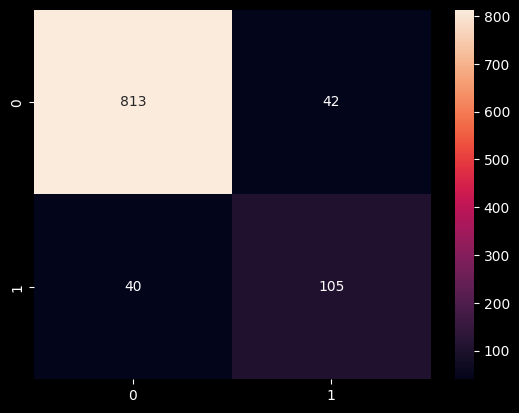

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, fmt='.0f')

##Настройка гиперпараметров модели для повышения точности предсказания

In [ ]:
clf = DecisionTreeClassifier(random_state=1)

In [ ]:
params = {'max_depth': range(1,7,1), 'min_samples_leaf': range(1,6,1)} #словарь гиперпараметрс

In [ ]:
grid = GridSearchCV(clf, params, cv = 5, n_jobs = -1 )

In [ ]:
%%timeit
grid.fit(x_train, y_train) # обучение на кросс валидации

2.16 s ± 670 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 1}

In [ ]:
best_clf = grid.best_estimator_

In [ ]:
y_pred = best_clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.89      0.67      0.76       145

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
grid.best_score_

0.9391265588957

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
sample_pred = pd.DataFrame({

    'State': [1],
    'Account length': [0],
    'Area code': [0],
    'International plan': [0],
    'Voice mail plan': [0],
    'Number vmail messages': [20],
    'Total day minutes': [0],
    'Total day calls': [0],
    'Total day charge': [0],
    'Total eve minutes': [11],
    'Total eve calls': [0],
    'Total eve charge': [0],
    'Total night minutes': [0],
    'Total night calls': [0],
    'Total night charge': [0],
    'Total intl minutes': [0],
    'Total intl calls': [0],
    'Total intl charge': [0],
    'Customer service calls':[0]

})

In [ ]:
result = best_clf.predict(sample_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print(f'result: {result[0]}')

result: 0


##K ближайших соседей

In [ ]:
np.random.seed(1)
knn_clf = KNeighborsClassifier(n_neighbors=13)

In [ ]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred = knn_clf.predict(x_test)

In [ ]:
knn_clf.score(x_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       855
           1       0.88      0.21      0.34       145

    accuracy                           0.88      1000
   macro avg       0.88      0.60      0.63      1000
weighted avg       0.88      0.88      0.85      1000



##Random Forest - случайные леса

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=258,random_state=2)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=258, random_state=2)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
rf.score(x_test,y_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.949

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       855
           1       0.96      0.68      0.79       145

    accuracy                           0.95      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
rfc = RandomForestClassifier(random_state=2)

In [ ]:
params = {'max_depth':[3,5,7,None],'n_estimators':[200]}

In [ ]:
grid = GridSearchCV(rfc,params,cv=5,n_jobs=-1)

In [ ]:
%%timeit
grid.fit(x_train,y_train)

16.4 s ± 291 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [ ]:
grid.best_score_

0.9541268805543558

In [ ]:
grid.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=2)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
grid.best_score_

0.9541268805543558

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.94      0.67      0.78       145

    accuracy                           0.95      1000
   macro avg       0.94      0.83      0.88      1000
weighted avg       0.95      0.95      0.94      1000



In [ ]:
y_pred_base = grid.predict(pred_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_pred_base[0]

1

In [ ]:
y_test

,Churn
3274,0
250,1
3111,0
767,0
60,0
...,...
768,0
1083,0
2501,0
1952,0


##Логистическая регрессия

для модели класиффикации линейная регрессия - это логистическая регрессия

In [ ]:
log_reg = LogisticRegression(random_state=1,C=1)

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1, random_state=1)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       855
           1       0.51      0.19      0.28       145

    accuracy                           0.86      1000
   macro avg       0.69      0.58      0.60      1000
weighted avg       0.82      0.86      0.83      1000



##SGD - Стохастический градиентный спуск

In [ ]:
sgd_cls = SGDClassifier(random_state=1,epsilon=0.001)

In [ ]:
sgd_cls.fit(x_train,y_train)

SGDClassifier(epsilon=0.001, random_state=1)

In [ ]:
y_pred = sgd_cls.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       855
           1       0.35      0.24      0.29       145

    accuracy                           0.83      1000
   macro avg       0.62      0.58      0.59      1000
weighted avg       0.80      0.83      0.81      1000



##SVM - системма опорных векторов

In [ ]:
svm = SVC(random_state=1,C=2)

In [ ]:
svm.fit(x_train,y_train)

SVC(C=2, random_state=1)

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.922

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       855
           1       0.85      0.56      0.68       145

    accuracy                           0.92      1000
   macro avg       0.89      0.77      0.82      1000
weighted avg       0.92      0.92      0.91      1000



##Сохранение модели в файл

3.15

##Сохранение предсказания в файл

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_Series = pd.Series(y_pred, name = 'pred')

In [ ]:
y_pred_Series.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [ ]:
y_pred_Series.to_csv('predict.csv', header=True)